# Data analysis

#### Nhập thư viện

In [114]:
import pandas as pd
import numpy as np
import datetime
import re
import calmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#### Đọc dữ liệu từ file csv

In [115]:
df = pd.read_csv('Data/sieuanhhungMarvel.csv')

In [116]:
df.head()

post_id                                               text  \
0  734518898719448  Các bạn nam chắc ai cũng muốn học chiêu pause ...   
1  734285772076094  Nếu như Pedro một mình cân tất cả các vai ở Fa...   
2  734234215414583  Sau bom tấn Spider-Man 2 thì dự án tiếp theo c...   
3  734194055418599                                   Infinity Magic 🔥   
4  733990162105655  Nam diễn viên Steven Yeun được xác nhận từ nhi...   

                  time                                         images_low  \
0  2023-11-18 22:40:26  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...   
1  2023-11-18 12:51:48  ['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...   
2  2023-11-18 10:21:01  ['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...   
3  2023-11-18 08:30:34  ['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...   
4  2023-11-17 23:17:50  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...   

   like  love  haha  sad  wow  care  angry  reaction_count  shares  comment  \
0  1983    18   801    8    1     6      0            2817      21      101   
1  2014    19  1667   21    4     7      1            3733      13       94   
2  1543    45   275    5    8     5      1            1882       9       51   
3  3997   638    18    4   14    26      1            4698      34       60   
4   732    56   171    1    2     3      1             966       5       56   

                                       comments_full  year  month  day  
0  [{'comment_id': '302120192733098', 'comment_ur...  2023     11   18  
1  [{'comment_id': '361135779633240', 'comment_ur...  2023     11   18  
2  [{'comment_id': '1012246983374962', 'comment_u...  2023     11   18  
3  [{'comment_id': '1842669876147189', 'comment_u...  2023     11   18  
4  [{'comment_id': '1410796539783216', 'comment_u...  2023     11   17

#### Ngày đăng nhiều post nhất

In [117]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

post_count_by_date = df.groupby('date')['post_id'].count().reset_index(name='post_count')
max_post_date = post_count_by_date.loc[post_count_by_date['post_count'].idxmax()]

print("Ngày có nhiều post nhất là:", max_post_date['date'])
print("Số lượng post:", max_post_date['post_count'])

Ngày có nhiều post nhất là: 2023-10-23
Số lượng post: 7


#### Ngày đăng ít post nhất (tính từ 19/9 - 18/11)

In [118]:
def find_missing_date(df):
    start_date = pd.to_datetime('19/9/2023', format='%d/%m/%Y')
    end_date = pd.to_datetime('20/11/2023', format='%d/%m/%Y')

    all_dates = pd.date_range(start_date, end_date, freq='D')
    all_dates_df = pd.DataFrame({'date': all_dates})

    all_dates_df['date'] = pd.to_datetime(all_dates_df['date'])

    missing_dates = all_dates_df[~all_dates_df['date'].isin(df['date'])]['date']

    return missing_dates

In [119]:
if len(find_missing_date(df)) > 0:
    temp = find_missing_date(df)
    for i in range(len(temp)):
        print("Ngày có ít post nhất: ", temp.iloc[i])
        print("Số lượng post: 0")
else:
    post_count_by_date = df.groupby('date')['post_id'].count().reset_index(name='post_count')

    min_post_date = post_count_by_date.loc[post_count_by_date['post_count'].idxmin()]

    print("Ngày có ít post nhất:", min_post_date['date'])
    print("Số lượng post:", min_post_date['post_count'])

Ngày có ít post nhất:  2023-11-19 00:00:00
Số lượng post: 0
Ngày có ít post nhất:  2023-11-20 00:00:00
Số lượng post: 0


#### Bài viết có nhiều lượt thả haha nhất

In [120]:
max_haha_post = df.loc[df.haha.idxmax()]

print("Post id: ", max_haha_post['post_id'])
print("Haha: ", max_haha_post['haha'])
print('Date: ', max_haha_post.date)

Post id:  726632232841448
Haha:  14682
Date:  2023-11-04


#### Bài viết ít haha nhất

In [121]:
min_haha_post = df.loc[df.haha.idxmin()]

print("Post id: ", min_haha_post['post_id'])
print("Haha: ", min_haha_post['haha'])
print('Date: ', min_haha_post.date)

Post id:  724257629745575
Haha:  0
Date:  2023-10-31


#### Ngày có nhiều lượt thả cảm xúc nhất

In [122]:
max_reaction_count = df.loc[df.reaction_count.idxmax()]

print("Post id: ", max_reaction_count.post_id)
print("Reaction_count: ", max_reaction_count.reaction_count)
print('Date: ', max_reaction_count.date)

Post id:  726632232841448
Reaction_count:  25249
Date:  2023-11-04


#### Bài viết có ít lượt thả reaction nhất

In [123]:
min_reaction_count = df.loc[df.reaction_count.idxmin()]

print("Post id: ", min_reaction_count.post_id)
print("Reaction_count: ", min_reaction_count.reaction_count)
print('Date: ', min_reaction_count.date)

Post id:  727818706056134
Reaction_count:  132
Date:  2023-11-06


#### Bài viết có nhiều lượt share nhất

In [124]:
max_shares = df.loc[df.shares.idxmax()]

print("Post id: ", max_shares.post_id)
print("Shares: ", max_shares.shares)
print("Date: ", max_shares.date)

Post id:  726632232841448
Shares:  600
Date:  2023-11-04


#### Bài viết ít lượt share nhất

In [125]:
min_shares = df.loc[df.shares.idxmin()]

print("Post id: ", min_shares.post_id)
print("Shares: ", min_shares.shares)
print("Date: ", min_shares.date)

Post id:  701329305371741
Shares:  0
Date:  2023-09-24


#### Bài viết có nhiều comment nhất

In [126]:
max_comment = df.loc[df.comment.idxmax()]

print("Post id: ", max_comment.post_id)
print("Comment: ", max_comment.shares)
print("Date: ", max_comment.date)

Post id:  714998230671515
Comment:  235
Date:  2023-10-16


#### Bài viết có ít comment nhất

In [127]:
min_comment = df.loc[df.comment.idxmin()]

print("Post id: ", min_comment.post_id)
print("Comment: ", min_comment.shares)
print("Date: ", min_comment.date)

Post id:  724257629745575
Comment:  8
Date:  2023-10-31


#### Nhân vật marvel được nhắc đến nhiều nhất trong nội dung bài viết(19/9 - 18/11)

In [160]:
avengers_characters = ["Iron Man","Captain America","Thor","Hulk","Black Widow","Hawkeye","Black Panther","Doctor Strange","Scarlet Witch","Vision","Ant-Man","Wasp","Falcon","Winter Soldier","Star-Lord","Gamora","Drax the Destroyer","Rocket","Groot","Mantis","Nebula","Captain Marvel","Spider-Man","Loki","Nick Fury","Maria Hill"]

character_counts = pd.Series(index=avengers_characters, dtype=int)

for character in avengers_characters:
    character_counts[character] = df['text'].str.count(character).sum()

print(character_counts)
print("Max:", character_counts.idxmax(), ":", int(character_counts[character_counts.idxmax()]))

Iron Man               0.0
Captain America        5.0
Thor                   6.0
Hulk                   1.0
Black Widow            4.0
Hawkeye                1.0
Black Panther          2.0
Doctor Strange         3.0
Scarlet Witch          0.0
Vision                 3.0
Ant-Man                1.0
Wasp                   1.0
Falcon                 1.0
Winter Soldier         0.0
Star-Lord              1.0
Gamora                 0.0
Drax the Destroyer     0.0
Rocket                 0.0
Groot                  0.0
Mantis                 0.0
Nebula                 0.0
Captain Marvel         7.0
Spider-Man            11.0
Loki                  74.0
Nick Fury              0.0
Maria Hill             0.0
dtype: float64
Max: Loki : 74


#### Những từ khóa được nhắc đến nhiều trong nội dung của bài post (5/11/2023 - 12/11/2023)

In [129]:
df['time'] = pd.to_datetime(df['time'])

start_date = pd.Timestamp('2023-11-05')
end_date = pd.Timestamp('2023-11-12')

filtered_df = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

text = ""
for i in range(len(filtered_df)):
    text = text + str(filtered_df['text'].iloc[i])

text = text.lower()

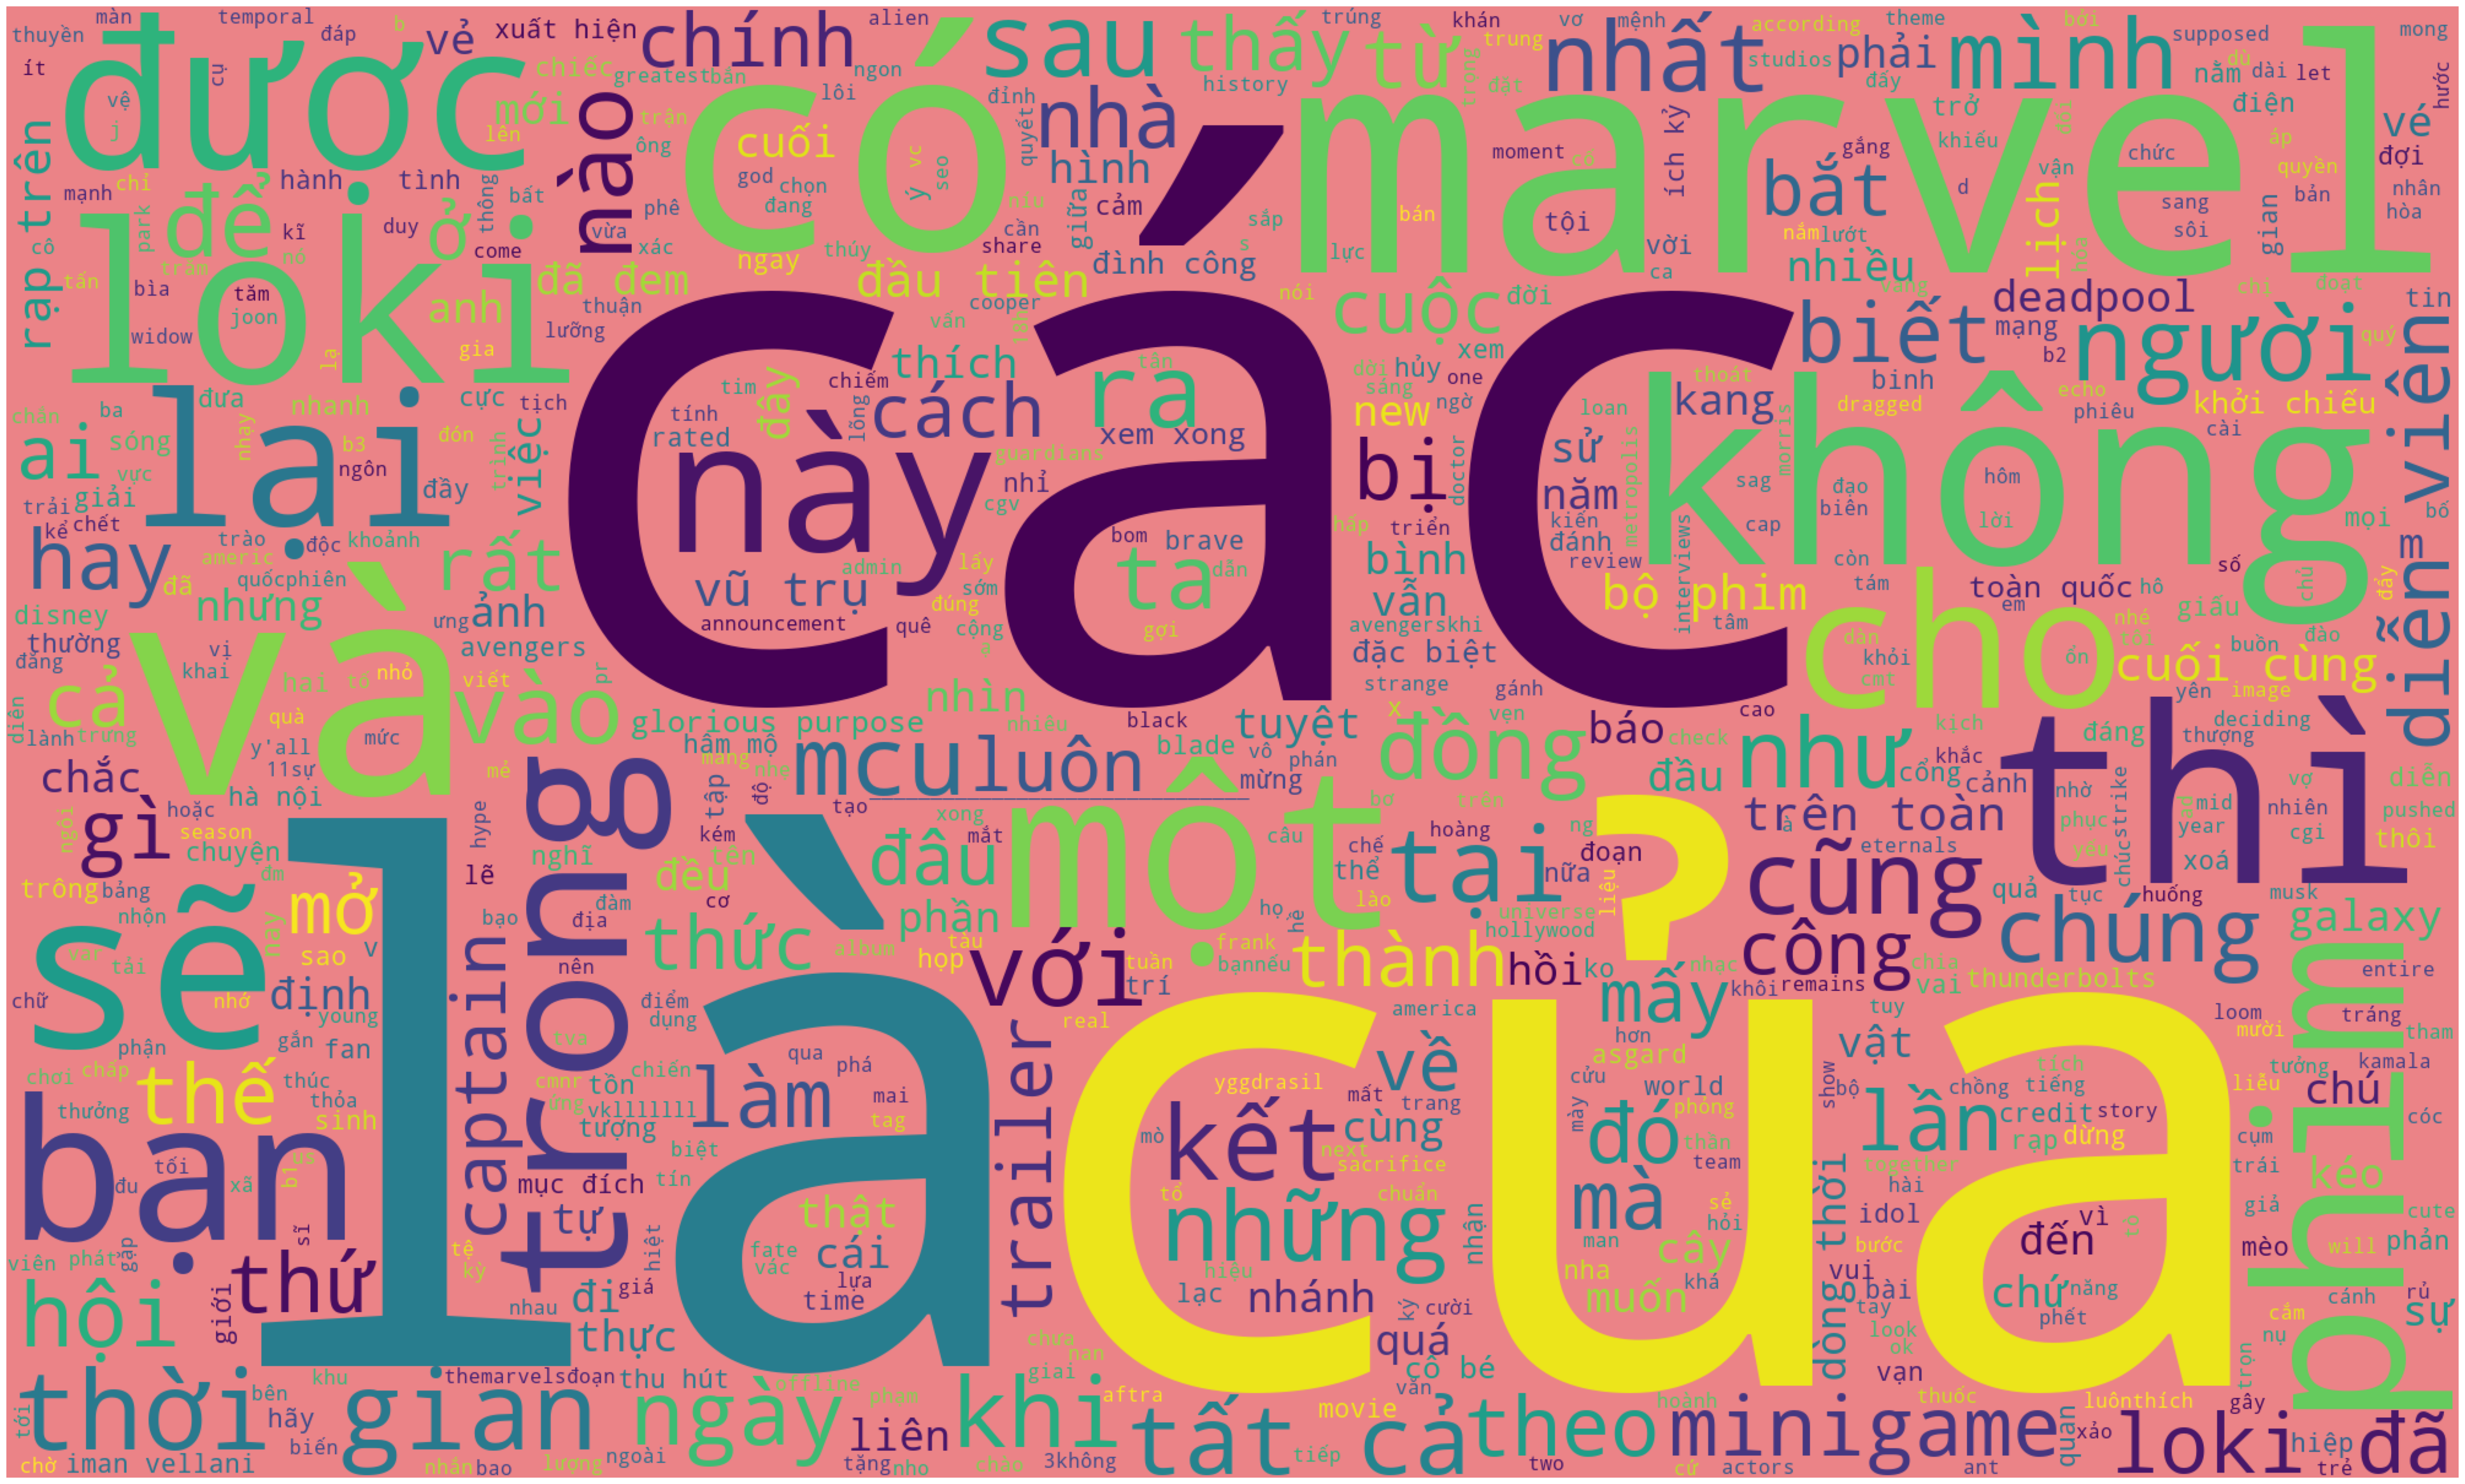

In [130]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='#eb8387', 
                      max_words=10000,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(50,30))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#### Trung bình lượt like, haha, wow, ... share, comment

In [131]:
average_values = df[['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry', 'shares']].mean().round(2)
average_values

like      2477.50
love       222.88
haha       873.88
sad         63.05
wow         11.05
care        11.74
angry        1.31
shares      36.03
dtype: float64

#### Biểu đồ cột thể hiện trung bình lượt thả các biểu tượng cảm xúc, comment, shares

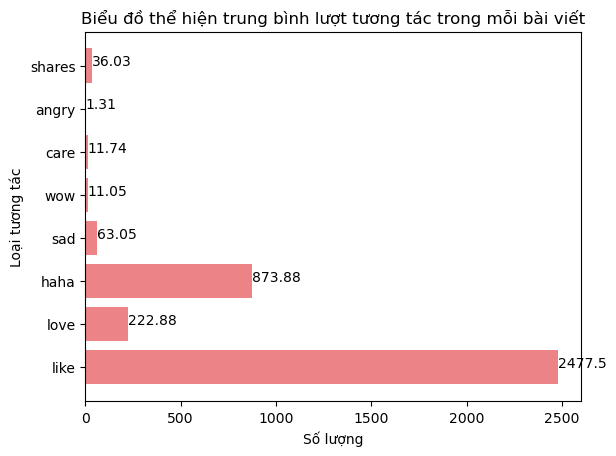

In [145]:
# Vẽ biểu đồ cột nằm ngang
plt.barh(average_values.index, average_values.values, color='#eb8387')

# Thêm chú thích giá trị ở đỉnh cột
for index, value in enumerate(average_values):
    plt.text(value, index, str(value))

# Đặt tên cho trục và tiêu đề
plt.xlabel('Số lượng')
plt.ylabel('Loại tương tác')
plt.title('Biểu đồ thể hiện trung bình lượt tương tác trong mỗi bài viết')

# Hiển thị biểu đồ
plt.show()


#### Tỉ lệ phần trăm các biểu tượng cảm xúc (20/10/2023 - 25/10/2023)

<Figure size 2000x1000 with 0 Axes>

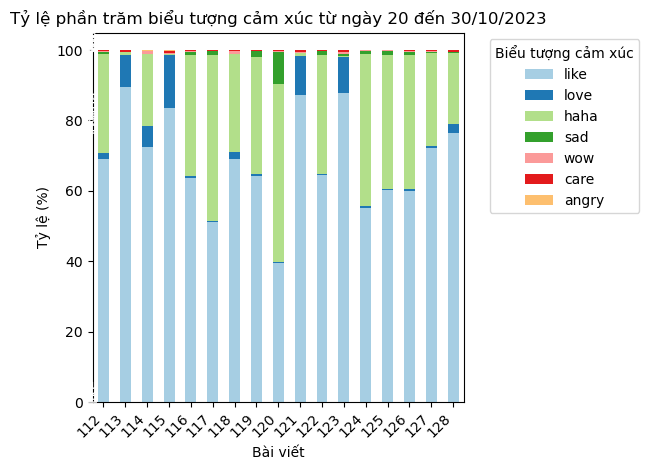

In [133]:
df['time'] = pd.to_datetime(df['time'])

# Lọc dữ liệu từ ngày 20 đến 30/10/2023
start_date = '2023-10-20'
end_date = '2023-10-25'
filtered_data = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Chọn các cột cần tính tỷ lệ
emotions = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry']
emotions_data = filtered_data[emotions]

total_reactions = emotions_data.sum(axis=1)

# Tính tỷ lệ phần trăm của mỗi biểu tượng
percentage_data = emotions_data.div(total_reactions, axis=0) * 100

plt.figure(figsize=(20, 10))
colors = plt.cm.Paired(range(len(emotions)))
percentage_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Tỷ lệ phần trăm biểu tượng cảm xúc từ ngày 20 đến 30/10/2023')
plt.xlabel('Bài viết')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Biểu tượng cảm xúc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

for i in range(len(emotions)):
    plt.text(-0.5, sum(percentage_data.iloc[:, :i].iloc[-1]), f'{emotions[i]}', ha='center', va='bottom', rotation='vertical', color='white')

plt.tight_layout()
plt.show()

#### Phương sai giữa các biểu tượng cảm xúc

In [134]:
emotions = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry']
emotions_data = df[emotions]

variance_data = emotions_data.var()

print(variance_data)

like     4.513623e+06
love     2.137592e+05
haha     2.601010e+06
sad      6.188533e+04
wow      5.842997e+02
care     2.633185e+02
angry    1.249268e+00
dtype: float64


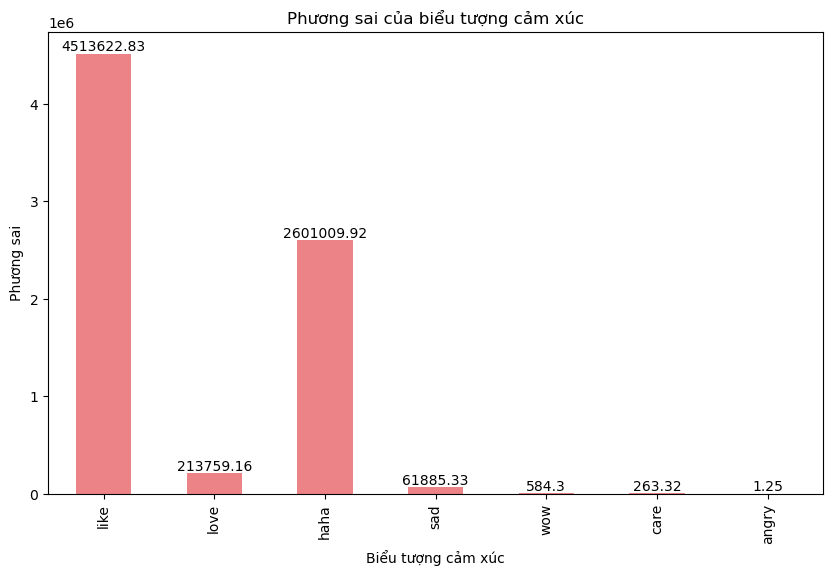

In [135]:
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột
variance_data.plot(kind='bar', color='#eb8387')

# Thêm chú thích giá trị lên trên từng cột
for i, value in enumerate(variance_data):
    plt.text(i, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.title('Phương sai của biểu tượng cảm xúc')
plt.xlabel('Biểu tượng cảm xúc')
plt.ylabel('Phương sai')
plt.show()


#### Vẽ biểu đồ thể hiện sự thay đổi lượng tương tác theo thời gian

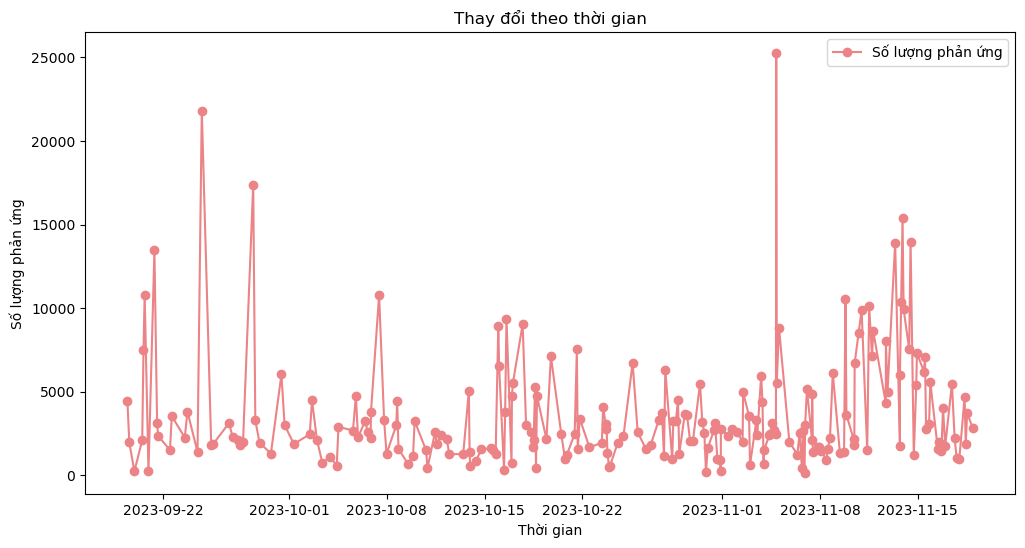

In [136]:
df['time'] = pd.to_datetime(df['time'])

# Sắp xếp DataFrame theo cột 'time'
df = df.sort_values(by='time')

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['reaction_count'], color='#eb8387', label='Số lượng phản ứng', marker='o')
plt.title('Thay đổi theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng phản ứng')
plt.legend()
plt.show()

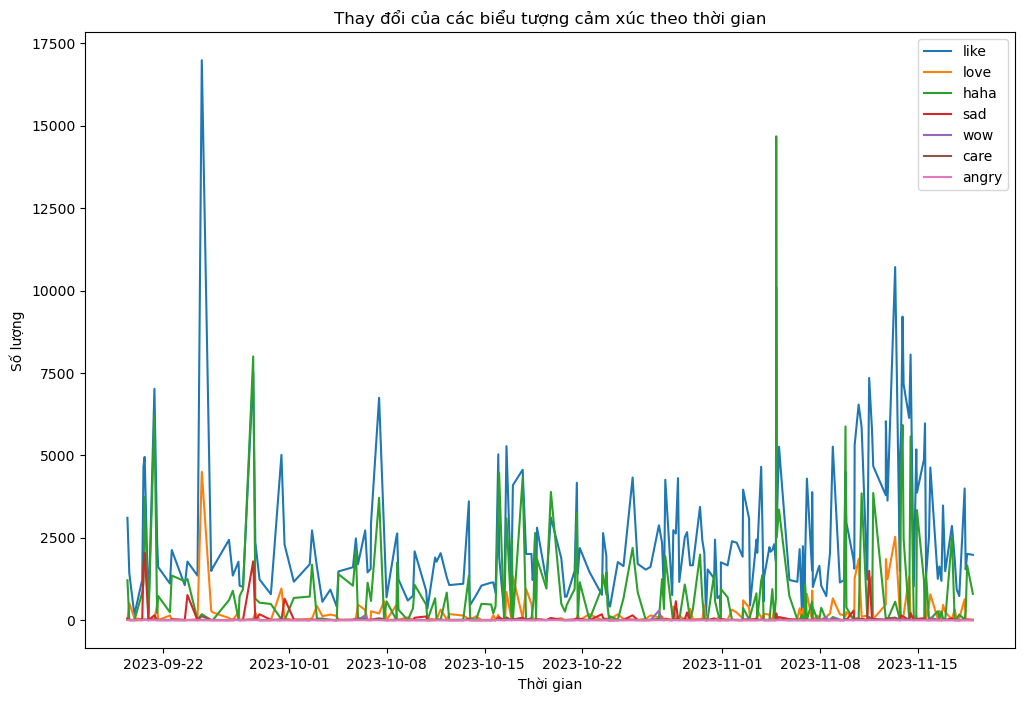

In [137]:
plt.figure(figsize=(12, 8))
emotions = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry']

for emotion in emotions:
    plt.plot(df['time'], df[emotion], label=emotion)

plt.title('Thay đổi của các biểu tượng cảm xúc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

#### 

#### Biểu đồ tương quan giữa lượt like và lượt chia sẻ 

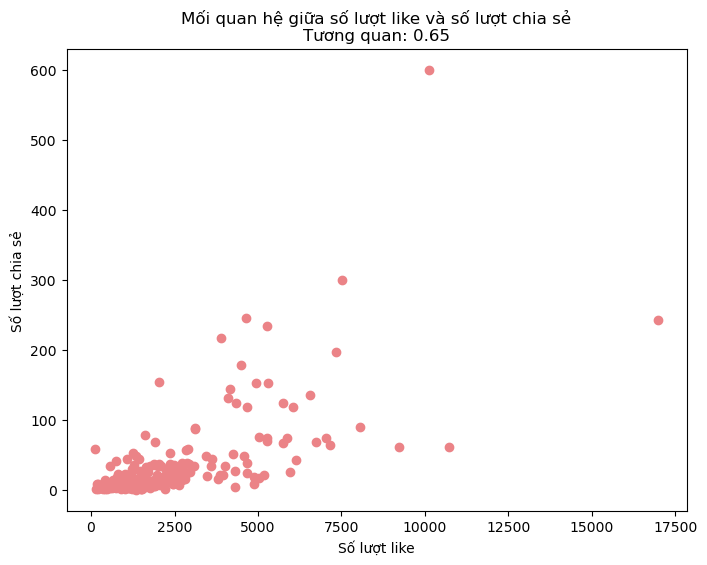

In [138]:
correlation_likes_shares = df['like'].corr(df['shares'])

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['like'], df['shares'], color='#eb8387')
plt.title(f'Mối quan hệ giữa số lượt like và số lượt chia sẻ\nTương quan: {correlation_likes_shares:.2f}')
plt.xlabel('Số lượt like')
plt.ylabel('Số lượt chia sẻ')
plt.show()

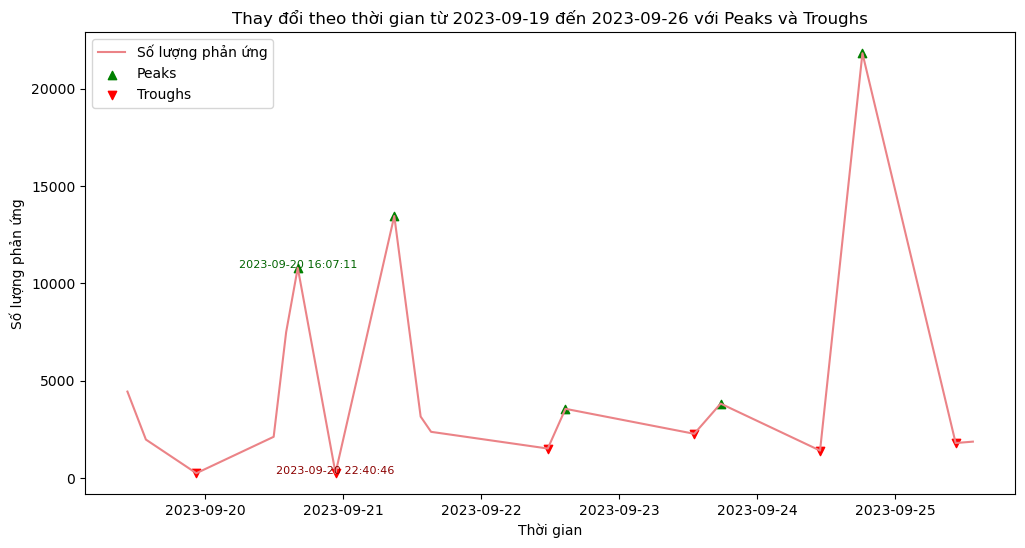

In [139]:
# Filter data for the desired date range
start_date = '2023-09-19'
end_date = '2023-09-26'
df_filtered = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Get the Peaks and Troughs for the filtered data
data = df_filtered['reaction_count'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1 * data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['time'], df_filtered['reaction_count'], label='Số lượng phản ứng', color='#eb8387')
plt.scatter(df_filtered['time'].iloc[peak_locations], df_filtered['reaction_count'].iloc[peak_locations], marker='^', color='green', label='Peaks')
plt.scatter(df_filtered['time'].iloc[trough_locations], df_filtered['reaction_count'].iloc[trough_locations], marker='v', color='red', label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df_filtered['time'].iloc[p], df_filtered['reaction_count'].iloc[p] + 15, str(df_filtered['time'].iloc[p]), horizontalalignment='center', color='darkgreen', fontsize=8)
    plt.text(df_filtered['time'].iloc[t], df_filtered['reaction_count'].iloc[t] - 35, str(df_filtered['time'].iloc[t]), horizontalalignment='center', color='darkred', fontsize=8)

# Decoration
plt.title(f'Thay đổi theo thời gian từ {start_date} đến {end_date} với Peaks và Troughs')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng phản ứng')
plt.legend()
plt.show()


#### Biểu đồ tương quan giữa reaction count và comment

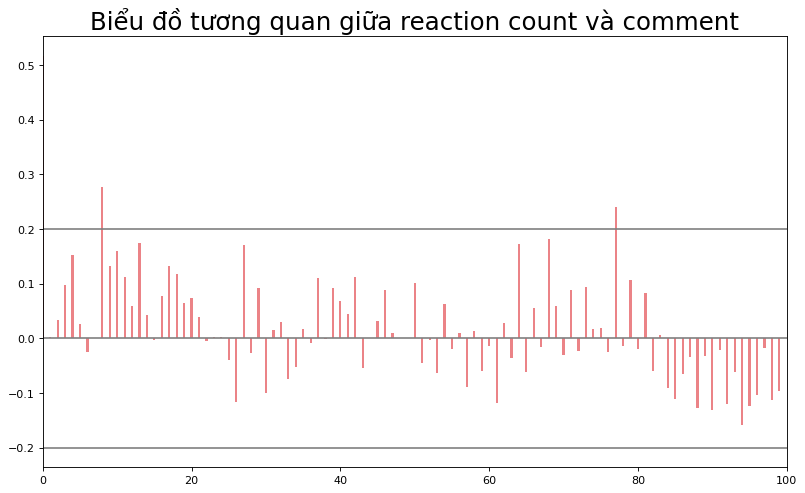

In [144]:
from statsmodels.tsa import stattools

x = df['reaction_count']
y = df['comment']

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12, 7), dpi=80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=0.3, color='#eb8387')

# Decoration
plt.title('Biểu đồ tương quan giữa reaction count và comment', fontsize=22)
plt.xlim(0, len(ccs))
plt.show()

#### sự tương quan giữa tháng và các phản ứng

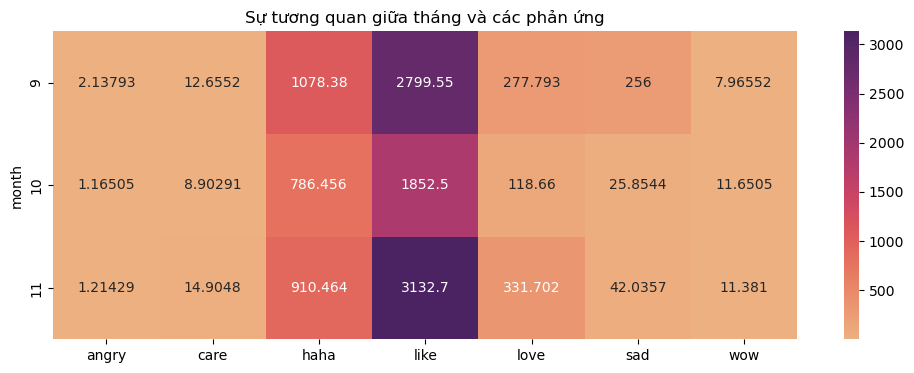

In [141]:
# Chuyển định dạng cột 'month' để đảm bảo rằng nó là kiểu dữ liệu số nguyên
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Tạo một pivot table để có được dữ liệu theo dạng phù hợp với heatmap
heatmap_data = df.pivot_table(index='month', values=['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry'])

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, annot=True, cmap='flare', fmt='g')
plt.title('Sự tương quan giữa tháng và các phản ứng')
plt.show()


#### Sự tương quan giữa các biểu tượng cảm xúc, comment, share

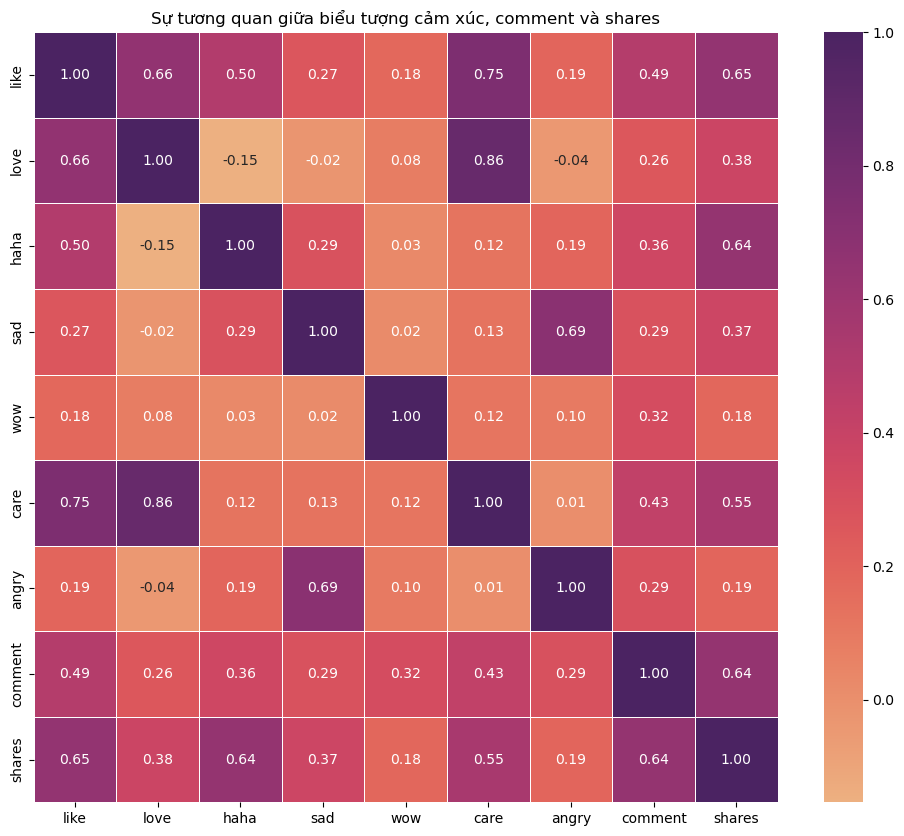

In [142]:
# Chọn các cột cần để tạo correllogram
selected_columns = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry', 'comment', 'shares']

# Tạo một DataFrame con chứa chỉ các cột đã chọn
correlation_data = df[selected_columns]

# Tính ma trận tương quan
correlation_matrix = correlation_data.corr()

# Vẽ correllogram bằng Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f', linewidths=.5)
plt.title('Sự tương quan giữa biểu tượng cảm xúc, comment và shares')
plt.show()

In [143]:
# Chuyển đổi cột 'time' thành định dạng datetime
data['time'] = pd.to_datetime(data['time'])

# Tạo một cột mới 'timestamp' chứa giá trị thời gian dưới dạng số
data['timestamp'] = data['time'].astype(int) / 10**9  # Chuyển đổi thành giây

# Chọn đặc trưng
features = ['like', 'love', 'haha', 'sad', 'wow', 'care', 'angry', 'reaction_count', 'shares', 'comment']
X = data[features]
y = data['timestamp']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

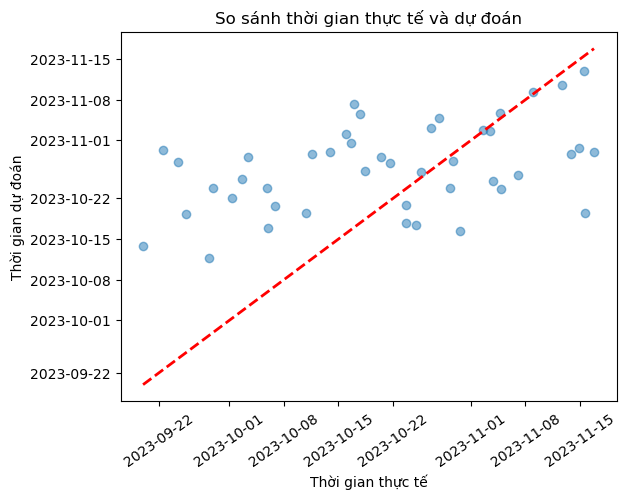

In [ ]:
# Chuyển đổi thời gian dự đoán và thời gian thực tế về định dạng datetime
y_test_datetime = pd.to_datetime(y_test, unit='s')
y_pred_datetime = pd.to_datetime(y_pred, unit='s')

# Vẽ biểu đồ so sánh kết quả dự đoán với thời gian thực tế
plt.scatter(y_test_datetime, y_pred_datetime, alpha=0.5)
plt.plot([min(y_test_datetime), max(y_test_datetime)], [min(y_test_datetime), max(y_test_datetime)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Thời gian thực tế')
plt.ylabel('Thời gian dự đoán')
plt.title('So sánh thời gian thực tế và dự đoán')
plt.xticks(rotation=35)  # Quay label trục x để hiển thị dễ đọc hơn
plt.show()


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
df.columns

Index(['level_0', 'index', 'post_id', 'text', 'time', 'images_low', 'like',
       'love', 'haha', 'sad', 'wow', 'care', 'angry', 'reaction_count',
       'shares', 'comment', 'comments_full', 'year', 'month', 'day', 'date',
       'like_z', 'colors'],
      dtype='object')